## Titanic survived Project
Project Description
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not.



Data Dictionary

Survived: 0 = No, 1 = Yes
pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
sibsp: # of siblings / spouses aboard the Titanic
parch: # of parents / children aboard the Titanic
ticket: Ticket number
cabin: Cabin number
embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton


## Step 1: Importing Basic Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2 : Loading Data :  Importing the dataset into our data analysis environment

In [2]:
df= pd.read_csv('/Users/sneha/Downloads/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Step 3: Perfrom EDA on Data


In [3]:
## Diaplay first 5 data 
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Check dimensions
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 891
Number of columns: 12


In [6]:
# Data types
data_types = df.dtypes
print("Data Types:")
print(data_types)

Data Types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [8]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

## The values in column "Survived" can be used to determine whether each passenger survived or not:
# if it’s a “1”, the passenger survived.
# if it’s a “0”, the passenger died.
## Which is also our OUtput Column , Since The output column is categorical A Classification model is to be designed. 

### 3.1 Summary Statistics: Compute summary statistics (e.g., mean, median, standard deviation, min, max) for numerical variables. This helps to understand the central tendencies and distributions of the data. 

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 3.2 Check for missing values 

In [8]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Cabin , Age and Embarked has missing values. 

### Step 3.3 Compute these missing values. Either delete or Replace. 
# Since it is not a huge data set I will try to replace those missing values to utmost Accuracy. 

## 1. For EMbarked only 2 missing values : 
## Replacing the missing value with a value with highest frequency.  

In [11]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

## 2.  For Age with 177 missing values : 
# Step 1 : Extracting Titles from Name : 
# Step 2 : Group Age according to the titles , SibSp, Parch.
# Step 3 : With titles mean age fill na. 
# Step 4 : If a certain combination has NA then replace it with Age mean. 

In [12]:
# Extract titles using regular expressions
df['Title'] = df['Name'].str.extract(',\s([A-Za-z]+)\.', expand=False)

# Display the extracted titles
print(df['Title'].value_counts())

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Don           1
Mme           1
Ms            1
Lady          1
Sir           1
Capt          1
Jonkheer      1
Name: Title, dtype: int64


In [13]:
age_by_title = df.groupby('Title')['Age'].mean() 
age_by_title

Title
Capt        70.000000
Col         58.000000
Don         40.000000
Dr          42.000000
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       4.574167
Miss        21.773973
Mlle        24.000000
Mme         24.000000
Mr          32.368090
Mrs         35.898148
Ms          28.000000
Rev         43.166667
Sir         49.000000
Name: Age, dtype: float64

In [14]:
grouped_means = df.groupby(['Title', 'Parch','SibSp'])['Age'].mean()
grouped_means

Title  Parch  SibSp
Capt   1      1        70.00
Col    0      0        58.00
Don    0      0        40.00
Dr     0      0        39.50
              2        47.00
                       ...  
Ms     0      0        28.00
Rev    0      0        44.25
              1        54.00
       1      0        28.00
Sir    0      1        49.00
Name: Age, Length: 73, dtype: float64

In [15]:
# Create a mask for rows with NaN 'Age' values
nan_age_mask = df['Age'].isna()

# Get unique combinations of 'Title', 'Sibsp', and 'Parch' for rows with NaN 'Age'
unique_combinations = df.loc[nan_age_mask, ['Title', 'SibSp', 'Parch']].drop_duplicates()

# Iterate through unique combinations and fill NaN 'Age' values
for index, row in unique_combinations.iterrows():
    title = row['Title']
    sibsp = row['SibSp']
    parch = row['Parch']
    
    group_mask = (df['Title'] == title) & (df['SibSp'] == sibsp) & (df['Parch'] == parch)
    nan_age_mask = group_mask & df['Age'].isna()
    
    # Calculate the mean age for the current group
    mean_age = df.loc[group_mask, 'Age'].mean()
    
    # If mean age is NaN, replace with Title and Parch group mean age
    if pd.isna(mean_age):
        title_parch_group_mean_age = df.loc[(df['Title'] == title) & (df['Parch'] == parch), 'Age'].mean()
        mean_age = title_parch_group_mean_age
    
    df.loc[nan_age_mask, 'Age'] = mean_age

In [16]:
## Check wheather Null Values have been replaced
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            1
dtype: int64

## 3. For column Cabin with more than 50 % missing values : Lets understand how can we replace the null values. 
Step 1 : I create a group by Pclass, fare and Embared . 
Step 2 : Replacing with Similar combinations 
Step 3 : If combation has no value then create its own value .

In [17]:
null_percentage = (df.isnull().sum() / len(df)) * 100
null_percentage

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.000000
Title           0.112233
dtype: float64

## Lets see if Fare and Pclass have any relation with Cabin 

In [18]:
nan_cabin_mask = df['Cabin'].isna()

# Get unique combinations of 'Pclass' and 'Fare' for rows with NaN 'Cabin'
unique_combinations = df.loc[nan_cabin_mask, ['Pclass', 'Fare' ,'Embarked']].drop_duplicates()

# Iterate through unique combinations and fill NaN 'Cabin' values
for index, row in unique_combinations.iterrows():
    pclass = row['Pclass']
    fare = row['Fare']
    embarked = row['Embarked']
    
    group_mask = (df['Pclass'] == pclass) & (df['Fare'] == fare) & (df['Embarked']== embarked)
    mode_cabin = df.loc[group_mask, 'Cabin'].mode()
    
    if not mode_cabin.empty:
        mode_cabin_value = mode_cabin.iloc[0]
        df.loc[group_mask & nan_cabin_mask, 'Cabin'] = mode_cabin_value
    else:
        new_cabin_value = f"C{pclass}_{int(fare)}"
        df.loc[group_mask & nan_cabin_mask, 'Cabin'] = new_cabin_value


In [19]:
df['Cabin'].value_counts()

C3_7     179
E10       43
D         41
F38       30
F2        29
        ... 
C110       1
A34        1
C2_32      1
D47        1
C148       1
Name: Cabin, Length: 209, dtype: int64

In [20]:
df['Cabin'] =  df['Cabin'].str[:1]

In [21]:
df['Cabin'].value_counts()

C    566
F     92
E     78
D     71
B     58
A     21
G      4
T      1
Name: Cabin, dtype: int64

In [22]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          1
dtype: int64

In [23]:
df['Title'] = df['Title'].fillna(df['Title'].mode()[0])


In [24]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

## We have successfully replaced Null values without hampering the dataset. 

## Step 3.4 Understanding Object data type in dataset , then converting them into integers. 

In [25]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Title           object
dtype: object

In [26]:
object_columns = df.select_dtypes(include='object')    
object_columns

,Name,Sex,Ticket,Cabin,Embarked,Title
0,"Braund, Mr. Owen Harris",male,A/5 21171,C,S,Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C,C,Mrs
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,C,S,Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C,S,Mrs
4,"Allen, Mr. William Henry",male,373450,E,S,Mr
...,...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,D,S,Rev
887,"Graham, Miss. Margaret Edith",female,112053,B,S,Miss
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,C,S,Miss
889,"Behr, Mr. Karl Howell",male,111369,C,C,Mr


In [27]:
object_columns.nunique()

Name        891
Sex           2
Ticket      681
Cabin         8
Embarked      3
Title        16
dtype: int64

## Except Name , Ticket column others can be categorized. 
 

# Float Columns : 

In [28]:
float_columns = df.select_dtypes(include='float')    
float_columns

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,9.6,23.4500
889,26.0,30.0000


In [ ]:
### Now with this updated data : Drop columns , Passanger Id, Name , Ticket. 

In [29]:
cols = ['PassengerId','Name','Ticket']

df = df.drop(columns=cols)


In [30]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,C,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,C,Mrs
2,1,3,female,26.0,0,0,7.9250,C,S,Miss
3,1,1,female,35.0,1,0,53.1000,C,S,Mrs
4,0,3,male,35.0,0,0,8.0500,E,S,Mr
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,D,S,Rev
887,1,1,female,19.0,0,0,30.0000,B,S,Miss
888,0,3,female,9.6,1,2,23.4500,C,S,Miss
889,1,1,male,26.0,0,0,30.0000,C,C,Mr


## 3.5 Output Column : Survived (0 : Dead , 1: Alive)

In [31]:
y = df['Survived']

In [32]:
value_counts = df['Survived'].value_counts()
value_counts

0    549
1    342
Name: Survived, dtype: int64

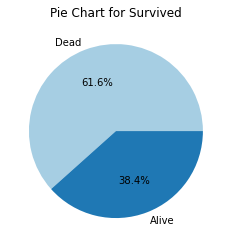

In [33]:


# Map values to human-readable labels
value_labels = {1: 'Alive', 0: 'Dead'}
value_counts.index = value_counts.index.map(value_labels)

# Create a colored pie chart
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)

# Add a title
plt.title(f'Pie Chart for Survived')

# Show the plot
plt.show()

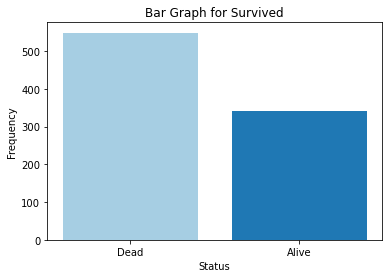

In [34]:
# Create a colored bar graph
plt.bar(value_counts.index, value_counts.values, color=plt.cm.Paired.colors)

# Add labels and title
plt.xlabel('Status')
plt.ylabel('Frequency')
plt.title(f'Bar Graph for Survived')

# Show the plot
plt.show()

## 549 people who boarded the titanic couldn't survive.
## 342 people survived the Titaninc .

### Step 4 : Separate Output and Input Columns  and Visualise it. 


In [36]:
X = df.drop(columns='Survived')
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,3,male,22.0,1,0,7.2500,C,S,Mr
1,1,female,38.0,1,0,71.2833,C,C,Mrs
2,3,female,26.0,0,0,7.9250,C,S,Miss
3,1,female,35.0,1,0,53.1000,C,S,Mrs
4,3,male,35.0,0,0,8.0500,E,S,Mr
...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,D,S,Rev
887,1,female,19.0,0,0,30.0000,B,S,Miss
888,3,female,9.6,1,2,23.4500,C,S,Miss
889,1,male,26.0,0,0,30.0000,C,C,Mr


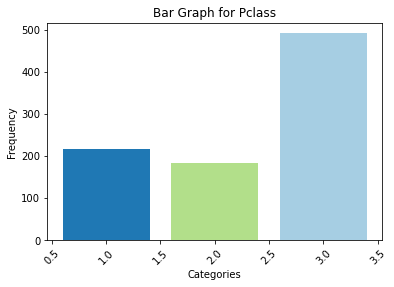

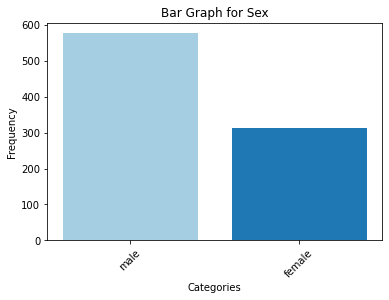

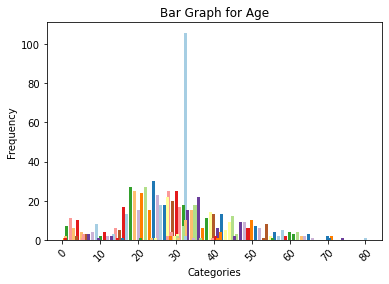

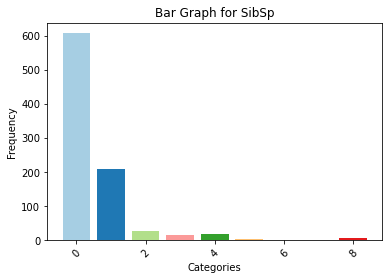

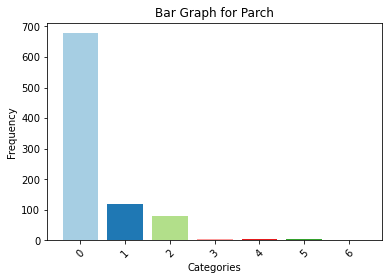

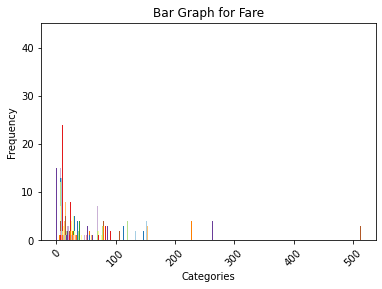

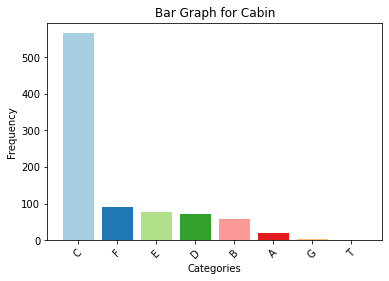

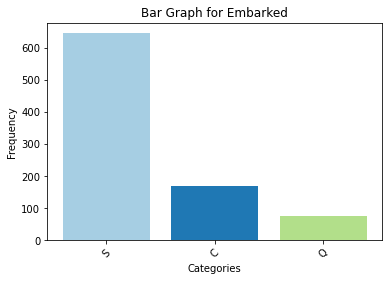

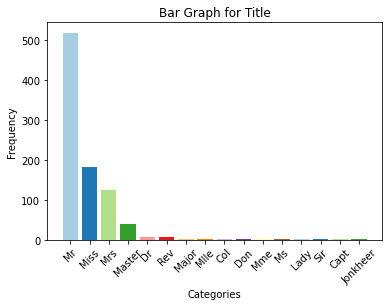

In [37]:
# Loop through each categorical column
for col in X.columns:
    # Calculate the frequency of each category in the column
    value_counts = X[col].value_counts()
    
    # Create a bar graph for the current column
    plt.bar(value_counts.index, value_counts.values, color=plt.cm.Paired.colors)
    
    # Add labels and title
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.title(f'Bar Graph for {col}')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Show the plot
    plt.show()

## Sex s Vs Survived 


<AxesSubplot:ylabel='Sex'>

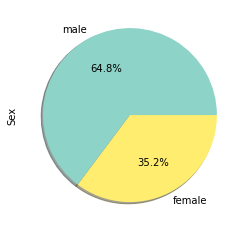

In [38]:
df['Sex'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, cmap='Set3')

<Figure size 720x432 with 0 Axes>

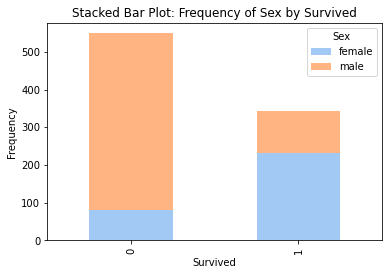

In [39]:
# Create a pivot table to count the frequency of each feature value based on the output
pivot_table = df.groupby([y, X['Sex']]).size().unstack()

# Create a stacked bar plot using seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.set_palette("pastel")
pivot_table.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.title(f'Stacked Bar Plot: Frequency of Sex by Survived')

# Show the plot
plt.legend(title= 'Sex')
plt.show()

## From above it can be easily infered More females Survivded than Males. 

## Pclass Vs Survived 

<AxesSubplot:ylabel='Pclass'>

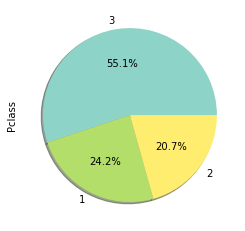

In [40]:
df['Pclass'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, cmap='Set3')

<Figure size 720x432 with 0 Axes>

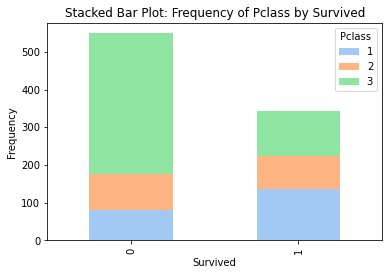

In [41]:
# Create a pivot table to count the frequency of each feature value based on the output
pivot_table = df.groupby([y, X['Pclass']]).size().unstack()

# Create a stacked bar plot using seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.set_palette("pastel")
pivot_table.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.title(f'Stacked Bar Plot: Frequency of Pclass by Survived')

# Show the plot
plt.legend(title= 'Pclass')
plt.show()

In [42]:
# Also Check for Sex , Pclass and Survived . 

pd.crosstab([df.Sex,df.Survived],df.Pclass,margins=True).style

/Users/sneha/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/sneha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


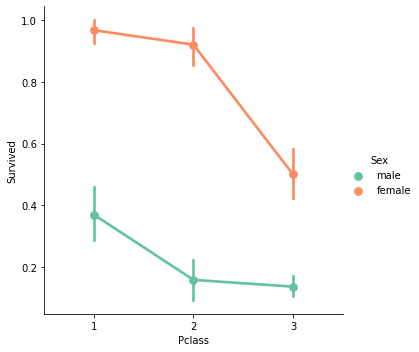

In [43]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df, palette='Set2')
plt.show()

## Females in Pclass 1 are more likely to survive than females in P class 3.
## Survival Rate for Pclass = 1 is more, Death rate for Pclass= 3 is more. 

## SibSp vs Survived

<Figure size 720x432 with 0 Axes>

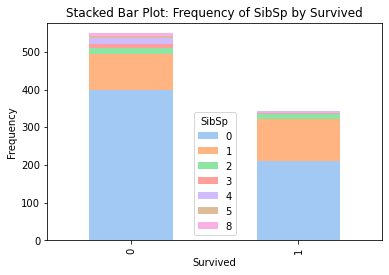

In [44]:
# Create a pivot table to count the frequency of each feature value based on the output
pivot_table = df.groupby([y, X['SibSp']]).size().unstack()

# Create a stacked bar plot using seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.set_palette("pastel")
pivot_table.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.title(f'Stacked Bar Plot: Frequency of SibSp by Survived')

# Show the plot
plt.legend(title= 'SibSp')
plt.show()

## People with 1 or more siblings or spouses are more likely to survive.
## People with no fam are more likely to die. 
## One thing that can be infered is Sibsp with value == 8 , ALL DIED. 

## Parch Vs Survived 

<Figure size 720x432 with 0 Axes>

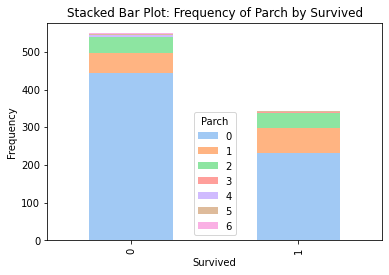

In [45]:
# Create a pivot table to count the frequency of each feature value based on the output
pivot_table = df.groupby([y, X['Parch']]).size().unstack()

# Create a stacked bar plot using seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.set_palette("pastel")
pivot_table.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.title(f'Stacked Bar Plot: Frequency of Parch by Survived')

# Show the plot
plt.legend(title= 'Parch')
plt.show()

## People with More than 0 Parch more likely to survive. 
## People with 0 Parch less likely to survive. 

## Embarked Vs Survived 

<Figure size 720x432 with 0 Axes>

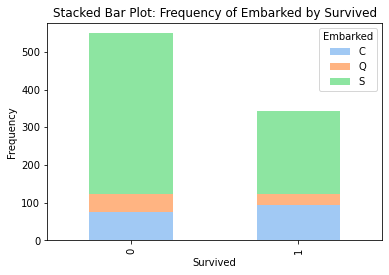

In [46]:
# Create a pivot table to count the frequency of each feature value based on the output
pivot_table = df.groupby([y, X['Embarked']]).size().unstack()

# Create a stacked bar plot using seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.set_palette("pastel")
pivot_table.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.title(f'Stacked Bar Plot: Frequency of Embarked by Survived')

# Show the plot
plt.legend(title= 'Embarked')
plt.show()

## People with Embarked < 2 are more likely to survive. 
embarked: Port of Embarkation C/0 = Cherbourg, Q/1 = Queenstown, S/2 = Southampton 

People Boarding From C more likely to survive. 

People Boarding From S more likely to be dead. 

## Title Vs Survived

<Figure size 720x432 with 0 Axes>

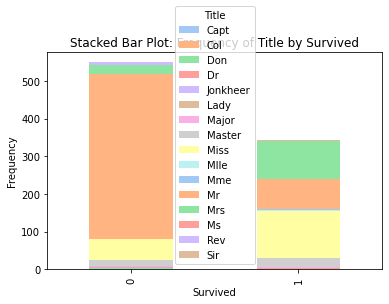

In [47]:
# Create a pivot table to count the frequency of each feature value based on the output
pivot_table = df.groupby([y, X['Title']]).size().unstack()

# Create a stacked bar plot using seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.set_palette("pastel")
pivot_table.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.title(f'Stacked Bar Plot: Frequency of Title by Survived')

# Show the plot
plt.legend(title= 'Title')
plt.show()

## Age Vs Survived

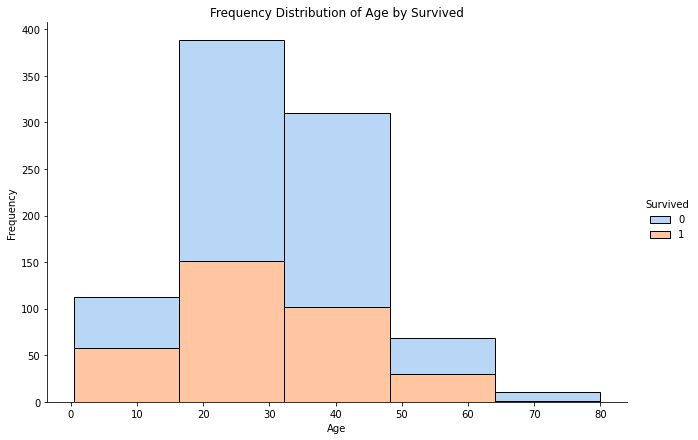

In [48]:
# Create a plot using Seaborn
# Create a plot using Seaborn displot
g = sns.displot(data=df, x='Age', hue='Survived', multiple='stack', bins=5, height=6, aspect=1.5)
g.set(title='Frequency Distribution of Age by Survived')
g.set_axis_labels('Age', 'Frequency')

plt.show()

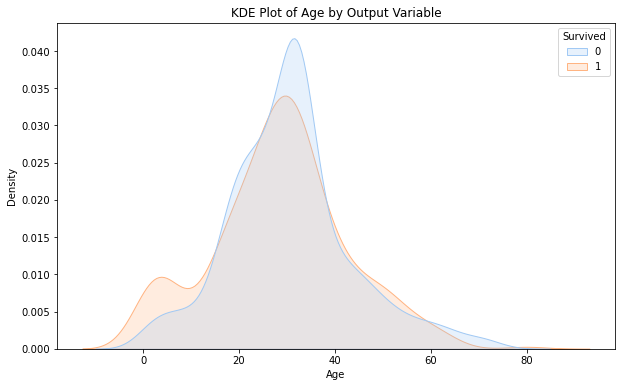

In [49]:
# Create a KDE plot using Seaborn
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Age', hue='Survived', common_norm=False, fill=True)
plt.title('KDE Plot of Age by Output Variable')
plt.xlabel('Age')
plt.ylabel('Density')


plt.show()

## Age group between 18-32 are more likely to survive. 
## Almost half of children survived.
## No one aobe 60 survived. 

## Fare Vs Survived

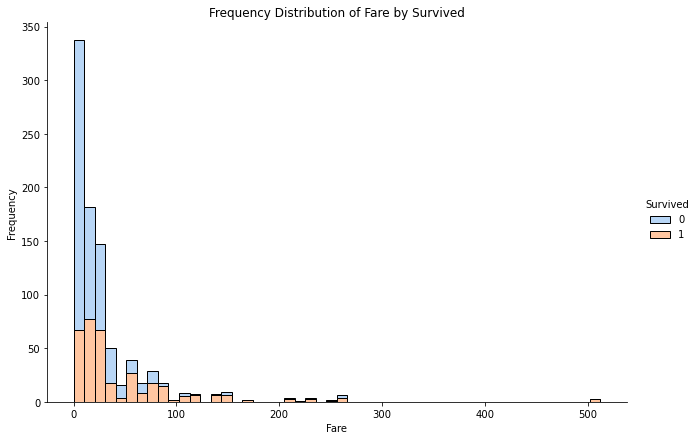

In [50]:
# Create a plot using Seaborn
# Create a plot using Seaborn displot
g = sns.displot(data=df, x='Fare', hue='Survived', multiple='stack', bins=50, height=6, aspect=1.5)
g.set(title='Frequency Distribution of Fare by Survived')
g.set_axis_labels('Fare', 'Frequency')

plt.show()

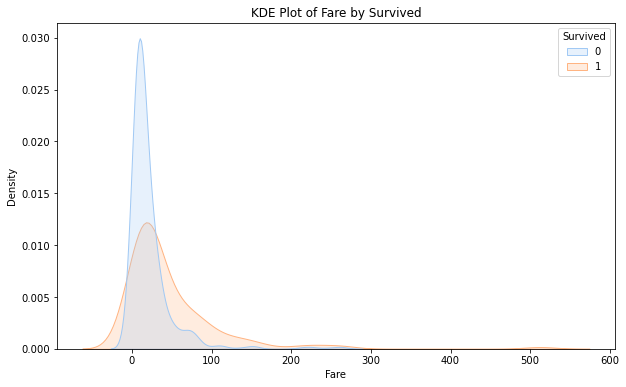

In [51]:
# Create a KDE plot using Seaborn
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Fare', hue='Survived', common_norm=False, fill=True)
plt.title('KDE Plot of Fare by Survived')
plt.xlabel('Fare')
plt.ylabel('Density')


plt.show()

## Ticket with highest value 500! Did Survive. 
## Tickets which is of the cheapest value are more likely to die. 
## Tickets which are expensive are more likely to survive. 

## Step 5:  Label Encoding  Converting Object Vlaues to Categroical values (BInary)

In [52]:
cols = 'Sex','Cabin','Embarked','Title'
from sklearn.preprocessing import LabelEncoder


# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Loop through each object column and perform label encoding
for column in cols:
    df[column] = label_encoder.fit_transform(df[column])

# Now, the object columns have been converted to integer type

## STep 6 : Sorting Float variables to Integer Variables. 

In [53]:

float_columns = df.select_dtypes(include="float")
for col in float_columns:
    df[col] = df[col].astype(int)

## STep 7 : Understanding Cor-relation between Features and Out put variable 

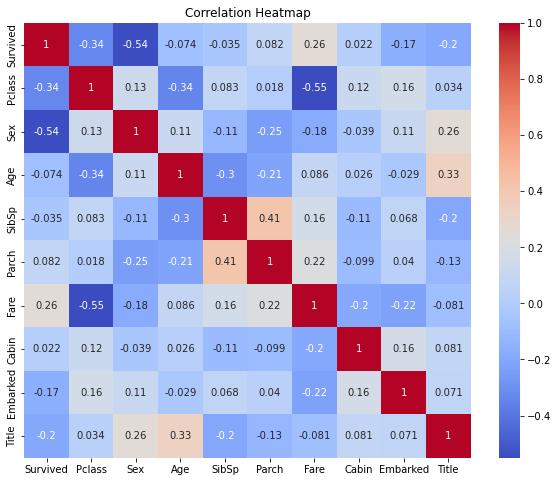

In [55]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Visualise the follwing features Vs Output 

Group 1 : Survived + Age + Sex 
Group 2 : Survived + Age + Pclass
Group 3 : Survived + Sex + SibSp/Parch     

## Group 1 : Survived + Age + Sex 

In [56]:
from tabulate import tabulate

In [57]:
# Create a cross tab using pandas
group_1  = pd.crosstab(index=[df['Sex'], df['Age']], columns=df['Survived'])
# Display the cross tab with lines using the tabulate library
print(tabulate(group_1, tablefmt='grid', headers='keys',showindex=True))

+---------+-----+-----+
|         |   0 |   1 |
+=========+=====+=====+
| (0, 0)  |   0 |   2 |
+---------+-----+-----+
| (0, 1)  |   0 |   2 |
+---------+-----+-----+
| (0, 2)  |   4 |   2 |
+---------+-----+-----+
| (0, 3)  |   1 |   1 |
+---------+-----+-----+
| (0, 4)  |   0 |   5 |
+---------+-----+-----+
| (0, 5)  |   3 |   4 |
+---------+-----+-----+
| (0, 6)  |   1 |   1 |
+---------+-----+-----+
| (0, 7)  |   0 |   1 |
+---------+-----+-----+
| (0, 8)  |   1 |   1 |
+---------+-----+-----+
| (0, 9)  |   5 |   0 |
+---------+-----+-----+
| (0, 10) |   1 |   0 |
+---------+-----+-----+
| (0, 11) |   1 |   0 |
+---------+-----+-----+
| (0, 12) |   0 |   1 |
+---------+-----+-----+
| (0, 13) |   3 |   2 |
+---------+-----+-----+
| (0, 14) |   2 |   3 |
+---------+-----+-----+
| (0, 15) |   1 |   4 |
+---------+-----+-----+
| (0, 16) |   1 |   5 |
+---------+-----+-----+
| (0, 17) |   1 |   5 |
+---------+-----+-----+
| (0, 18) |   5 |   9 |
+---------+-----+-----+
| (0, 19) |   0 

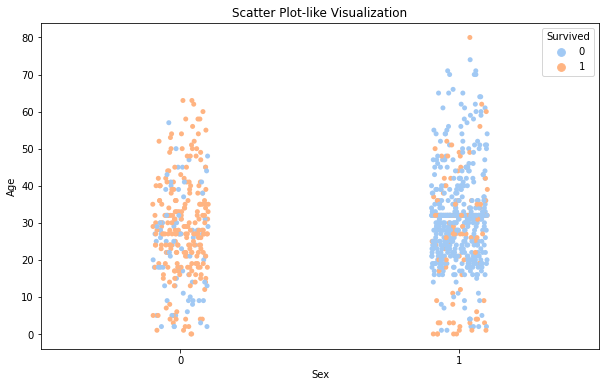

In [58]:
plt.figure(figsize=(10, 6))
sns.stripplot(data=df, x='Sex', y='Age', hue='Survived', jitter=True)
plt.title('Scatter Plot-like Visualization')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.legend(title='Survived')
plt.show()

## Group 2 : Survived + Age + Pclass 

In [59]:
# Create a cross tab using pandas
group_1  = pd.crosstab(index=[df['Pclass'], df['Age']], columns=df['Survived'])
# Display the cross tab with lines using the tabulate library
print(tabulate(group_1, tablefmt='grid', headers='keys',showindex=True))

+---------+-----+-----+
|         |   0 |   1 |
+=========+=====+=====+
| (1, 0)  |   0 |   1 |
+---------+-----+-----+
| (1, 2)  |   1 |   0 |
+---------+-----+-----+
| (1, 4)  |   0 |   1 |
+---------+-----+-----+
| (1, 11) |   0 |   1 |
+---------+-----+-----+
| (1, 14) |   0 |   1 |
+---------+-----+-----+
| (1, 15) |   0 |   1 |
+---------+-----+-----+
| (1, 16) |   0 |   3 |
+---------+-----+-----+
| (1, 17) |   0 |   3 |
+---------+-----+-----+
| (1, 18) |   1 |   3 |
+---------+-----+-----+
| (1, 19) |   2 |   3 |
+---------+-----+-----+
| (1, 21) |   1 |   2 |
+---------+-----+-----+
| (1, 22) |   1 |   4 |
+---------+-----+-----+
| (1, 23) |   0 |   3 |
+---------+-----+-----+
| (1, 24) |   2 |   5 |
+---------+-----+-----+
| (1, 25) |   1 |   2 |
+---------+-----+-----+
| (1, 26) |   0 |   2 |
+---------+-----+-----+
| (1, 27) |   1 |   4 |
+---------+-----+-----+
| (1, 28) |   2 |   2 |
+---------+-----+-----+
| (1, 29) |   2 |   1 |
+---------+-----+-----+
| (1, 30) |   1 

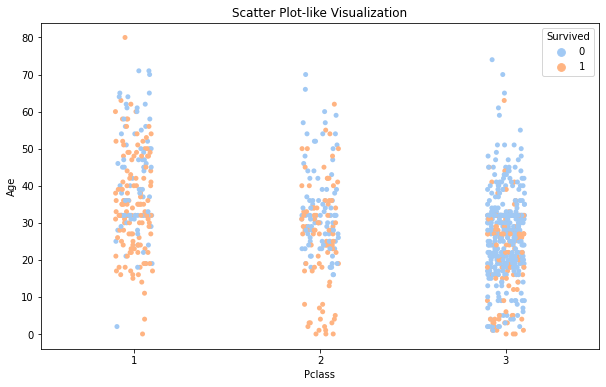

In [60]:
plt.figure(figsize=(10, 6))
sns.stripplot(data=df, x='Pclass', y='Age', hue='Survived', jitter=True)
plt.title('Scatter Plot-like Visualization')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.legend(title='Survived')
plt.show()

## Group 3 : Survived + Sex + SibSp/Parch 


In [61]:
# Create a cross tab using pandas
group_3  = pd.crosstab(index=[df['Sex'], df['SibSp']], columns=df['Survived'])
# Display the cross tab with lines using the tabulate library
print(tabulate(group_3, tablefmt='grid', headers='keys',showindex=True))

+--------+-----+-----+
|        |   0 |   1 |
+========+=====+=====+
| (0, 0) |  37 | 137 |
+--------+-----+-----+
| (0, 1) |  26 |  80 |
+--------+-----+-----+
| (0, 2) |   3 |  10 |
+--------+-----+-----+
| (0, 3) |   7 |   4 |
+--------+-----+-----+
| (0, 4) |   4 |   2 |
+--------+-----+-----+
| (0, 5) |   1 |   0 |
+--------+-----+-----+
| (0, 8) |   3 |   0 |
+--------+-----+-----+
| (1, 0) | 361 |  73 |
+--------+-----+-----+
| (1, 1) |  71 |  32 |
+--------+-----+-----+
| (1, 2) |  12 |   3 |
+--------+-----+-----+
| (1, 3) |   5 |   0 |
+--------+-----+-----+
| (1, 4) |  11 |   1 |
+--------+-----+-----+
| (1, 5) |   4 |   0 |
+--------+-----+-----+
| (1, 8) |   4 |   0 |
+--------+-----+-----+


## Step 9 : Standardising the data

In [62]:

# Separate features and target variable
X = df.drop(columns="Survived")
y = df['Survived']

from sklearn.preprocessing import StandardScaler

scale= StandardScaler()

X_data = scale.fit_transform(X)
X_data = pd.DataFrame(data=X_data,columns=X.columns)
X_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0.827377,0.737695,-0.573453,0.432793,-0.473674,-0.498948,-0.403344,0.585954,0.420010
1,-1.566107,-1.355574,0.625248,0.432793,-0.473674,0.789405,-0.403344,-1.942303,0.969540
2,0.827377,-1.355574,-0.273777,-0.474545,-0.473674,-0.498948,-0.403344,0.585954,-1.228577
3,-1.566107,-1.355574,0.400492,0.432793,-0.473674,0.427056,-0.403344,0.585954,0.969540
4,0.827377,0.737695,0.400492,-0.474545,-0.473674,-0.478817,1.291843,0.585954,0.420010
...,...,...,...,...,...,...,...,...,...
886,-0.369365,0.737695,-0.198859,-0.474545,-0.473674,-0.378164,0.444249,0.585954,2.068598
887,-1.566107,-1.355574,-0.798209,-0.474545,-0.473674,-0.035946,-1.250937,0.585954,-1.228577
888,0.827377,-1.355574,-1.547397,0.432793,2.008933,-0.176859,-0.403344,0.585954,-1.228577
889,-1.566107,0.737695,-0.273777,-0.474545,-0.473674,-0.035946,-0.403344,-1.942303,0.420010


## Step 10 : Feature Importance 

In [63]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf = RandomForestClassifier()

# Fit the model to the data
rf.fit(X, y)

# Get feature importances
feature_importance = rf.feature_importances_

# Display feature importances
print("Feature Importances:")
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance}")

Feature Importances:
Pclass: 0.0798375186031712
Sex: 0.21871694537782108
Age: 0.2408501476167388
SibSp: 0.051815152480870735
Parch: 0.0327301607174583
Fare: 0.18308269437936128
Cabin: 0.0468856711100726
Embarked: 0.03431229264801651
Title: 0.11176941706648963


## Age , Sex , Fare and Title plays a vital role in Output. 

## least important feature : Embarked , Parch

### We understand that Since SibSp : defines # no of Siblings / spouse  and parch Defines # parents or children. 

## We can create a new column of family members , by adding SibSp and Parch +1(himslef) 

## This will allow us to drop these two columns , which either way are contributing less to the output.

In [64]:
X['family_members'] = X['SibSp'] + X['Parch'] + 1


In [65]:
cols = ['SibSp','Parch']
X.drop(columns=cols)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,family_members
0,3,1,22,7,2,2,11,2
1,1,0,38,71,2,0,12,2
2,3,0,26,7,2,2,8,1
3,1,0,35,53,2,2,12,2
4,3,1,35,8,4,2,11,1
...,...,...,...,...,...,...,...,...
886,2,1,27,13,3,2,14,1
887,1,0,19,30,1,2,8,1
888,3,0,9,23,2,2,8,4
889,1,1,26,30,2,0,11,1


## Step 10. Splitting the data

In [66]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X_data, y, test_size=0.2, random_state =1000)

print(X.shape, X_train.shape, X_test.shape)

(891, 10) (712, 9) (179, 9)


## Step 11. Data Modeling 

Create a machine learning model pipeline which contains a list of model from which. we want to compare and find the most appropiate algorithm

In [67]:
### Import the model:

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

#from sklearn.svm import SVC 

from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import GaussianNB

#import xgboost as xgb




model_pipeline = []    ### create a pipeline model_pipeline

### Append the models and make some necessary updates to their parameters for better model performance.

model_pipeline.append(LogisticRegression())

model_pipeline.append(KNeighborsClassifier(n_neighbors=3))

model_pipeline.append(DecisionTreeClassifier(criterion='entropy',random_state=7))

model_pipeline.append(RandomForestClassifier(random_state=1))

model_pipeline.append(GaussianNB())

#model_pipeline.append(SVC())

#model_pipeline.append(xgb.XGBClassifier(random_state=1))

## Step 12. Fit model for train dataset  

In [68]:
for model in model_pipeline:
    model.fit(X_train,Y_train)    

## Step 13 . Model Evaluation 

## 13.1 Fetch Classification_Report for predictied data by each model. 


In [69]:
from sklearn.metrics import classification_report
from sklearn import metrics
for model in model_pipeline:
    print("MODEL NAME : ",model,"\n\n",classification_report(y,model.predict(X_data)),"\n\n\n")

MODEL NAME :  LogisticRegression() 

               precision    recall  f1-score   support

           0       0.82      0.87      0.85       549
           1       0.77      0.69      0.73       342

    accuracy                           0.80       891
   macro avg       0.80      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891
 



MODEL NAME :  KNeighborsClassifier(n_neighbors=3) 

               precision    recall  f1-score   support

           0       0.88      0.91      0.89       549
           1       0.84      0.80      0.82       342

    accuracy                           0.86       891
   macro avg       0.86      0.85      0.85       891
weighted avg       0.86      0.86      0.86       891
 



MODEL NAME :  DecisionTreeClassifier(criterion='entropy', random_state=7) 

               precision    recall  f1-score   support

           0       0.94      0.97      0.95       549
           1       0.95      0.90      0.92       342

    ac

## 13.2 Fetch model_score ; accuracy score of original and predicted data .
#### Accuracy score is the indicator of model performance.

In [70]:
#importing

model_score = []
acc_list = []

for model in model_pipeline:
    
    y_pred = model.predict(X_test)
    
    model_score.append(model.score(X_train,Y_train))
    
    acc_list.append(metrics.accuracy_score(Y_test,y_pred))

model_list=['Logistic_Regression','KNN Classifier','Decision Tree Classifier','Random Forest Classifier','GaussianNB']

score_list = pd.DataFrame({'Model':model_list, 'Model_score':model_score, 'Accuracy': acc_list})
score_list

,Model,Model_score,Accuracy
0,Logistic_Regression,0.808989,0.787709
1,KNN Classifier,0.879213,0.798883
2,Decision Tree Classifier,0.973315,0.815642
3,Random Forest Classifier,0.973315,0.810056
4,GaussianNB,0.785112,0.776536


#### Accuracy Score of Random Forest Classifier and Decision Tree Classifier is the highest.
#### Model with Least accuracy score is Gaussian NB classifier. 

## Step 13.4  Plot ROC Curve for each model : 
#### ROC is the plot of true positive rate against false positive rate at various classification threshold. 
#### AUC is the area under the ROC curve, and higher AUC indicates better model performance.

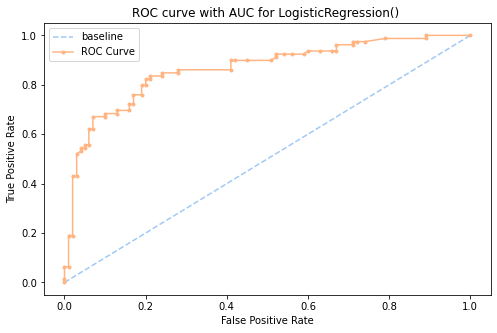

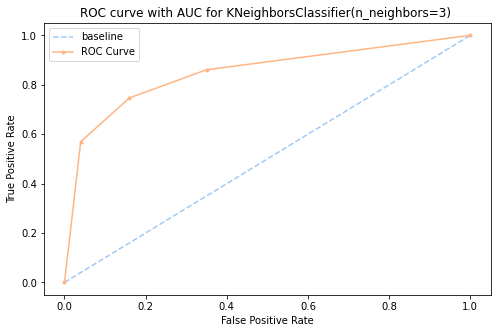

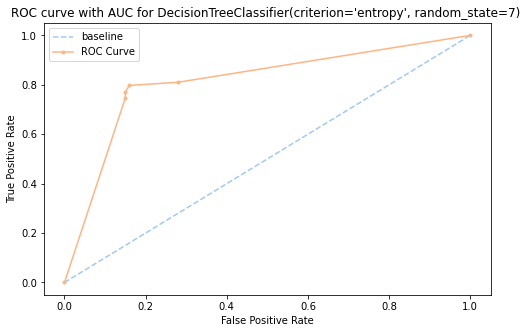

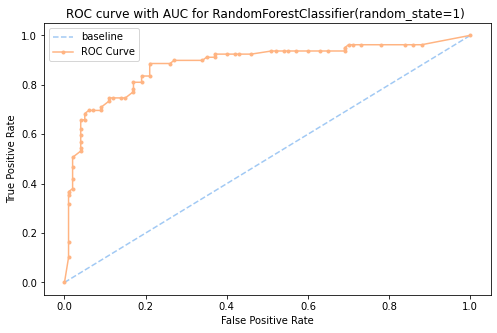

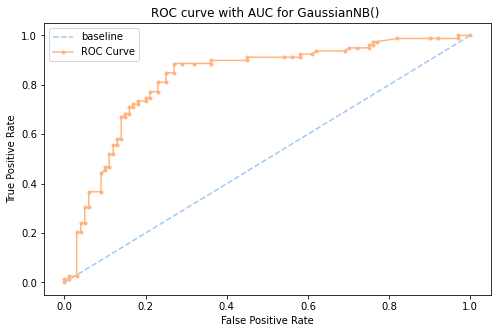

In [71]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

auc_roc=[] # list to store model roc_auc_score 
b_auc=[]
for model in model_pipeline:
    # generate a baseline prediction (majority class)
    baseline_probs = [0 for _ in range(len(Y_test))]
    # predict probabilities
    probs = model.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate scores
    auc_roc.append(roc_auc_score(Y_test, probs))
    b_auc.append(roc_auc_score(Y_test,baseline_probs))
    # calculate roc curves
    fpr, tpr, thresholds = roc_curve(Y_test, probs)
    bl_fpr, bl_tpr, thresholds = roc_curve(Y_test, baseline_probs) 
    # plot the roc curve for the model
    fig = plt.figure(figsize=(8,5))
    plt.plot(bl_fpr,bl_tpr, linestyle='--',label='baseline')
    plt.plot(fpr, tpr, marker='.',label='ROC Curve')
    # plot title
    plt.title("ROC curve with AUC for {} ".format(model))
    # axis labels
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    # show the legend
    plt.legend()

In [72]:
AUC_score = pd.DataFrame({'Model':model_list, 'roc_auc_score': auc_roc ,'baseline_auc' :b_auc})
AUC_score

,Model,roc_auc_score,baseline_auc
0,Logistic_Regression,0.864304,0.5
1,KNN Classifier,0.847848,0.5
2,Decision Tree Classifier,0.811962,0.5
3,Random Forest Classifier,0.883544,0.5
4,GaussianNB,0.828608,0.5


#### Since , higher AUC indicates better model performance : Random Forest Classifier has Highest auc score
#### While, Decision Tree Classifier has least AUC score

## Step 13.4   Plot Precision Recall curve for each model :
#### The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate.

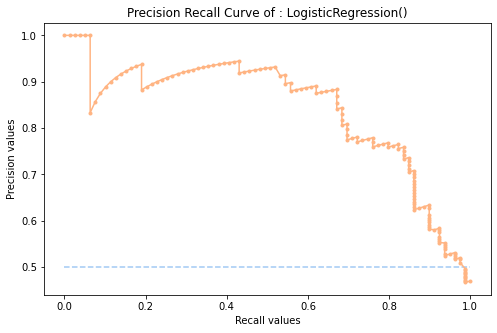

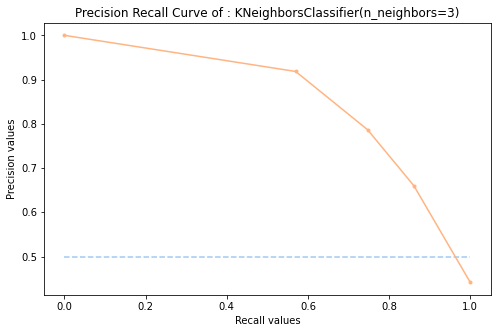

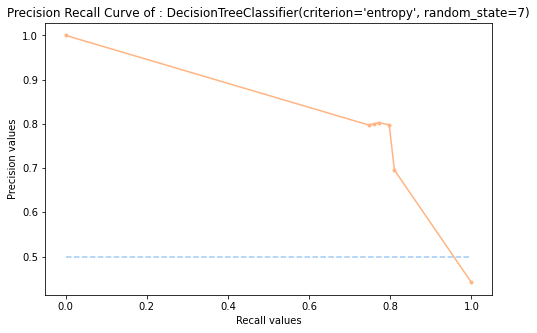

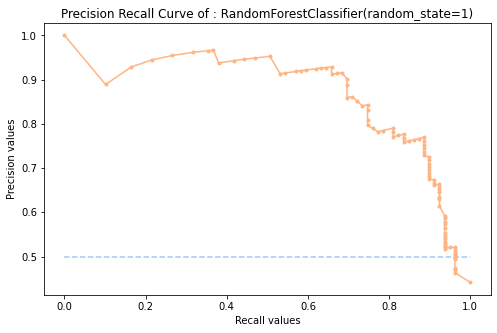

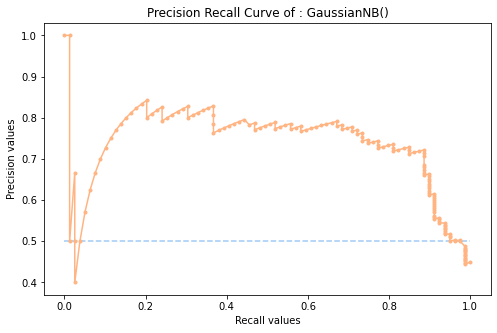

In [73]:
#Precision Recall Curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score


auc_pc=[]
ap=[]
f1=[]
for model in model_pipeline:
    # predict probabilities
    probs = model.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    probs = probs[:,1]
    # predict class values
    prediction = model.predict(X_test)
    precision, recall,thresholds = precision_recall_curve(Y_test, probs)
    auc_pc.append(metrics.auc(recall, precision))
    f1.append(f1_score(Y_test, prediction))
    ap.append(average_precision_score(Y_test, probs))
    
    # plot the precision-recall curves
    fig = plt.figure(figsize=(8,5))
    
    plt.ylabel("Precision values")
    plt.xlabel("Recall values")
    
    plt.title("Precision Recall Curve of : %s"%model)
    
    plt.plot([0, 1], [0.5, 0.5], linestyle='--',label = "baseline")
    plt.plot(recall, precision, marker='.',label="PR curve")



#### Random Forest Classifier covers the larger area under its curve, its AUC score is highest.
#### While, GaussianNB classifier covers the least area under its curve.

### Step 13.5 Summarize the Model Evaluation : 


In [74]:
result = pd.DataFrame({'Model':model_list, 'Model_score':model_score, 'Accuracy': acc_list, 
                       'roc_auc_score': auc_roc, 'f1-score': f1,'precision-recall AUC': auc_pc, 
                       'average precision score': ap })
result

,Model,Model_score,Accuracy,roc_auc_score,f1-score,precision-recall AUC,average precision score
0,Logistic_Regression,0.808989,0.787709,0.864304,0.743243,0.840113,0.841624
1,KNN Classifier,0.879213,0.798883,0.847848,0.766234,0.856555,0.799194
2,Decision Tree Classifier,0.973315,0.815642,0.811962,0.787097,0.829042,0.728530
3,Random Forest Classifier,0.973315,0.810056,0.883544,0.784810,0.867880,0.863480
4,GaussianNB,0.785112,0.776536,0.828608,0.736842,0.737956,0.743301


## After looking at the values My top 2 models are : Logistic and random Forest classifier

## Step 14 : Comapre the models with KNN algorithm. 

LogisticRegression():
 Mean: 0.796891
 Std: (0.032873) 
 Max:(0.853933)


KNeighborsClassifier(n_neighbors=3):
 Mean: 0.807041
 Std: (0.039890) 
 Max:(0.865169)


DecisionTreeClassifier(criterion='entropy', random_state=7):
 Mean: 0.793483
 Std: (0.018324) 
 Max:(0.820225)


RandomForestClassifier(random_state=1):
 Mean: 0.826105
 Std: (0.035528) 
 Max:(0.865169)


GaussianNB():
 Mean: 0.783396
 Std: (0.025581) 
 Max:(0.820225)




Text(0.5, 1.0, 'Model Comparision')

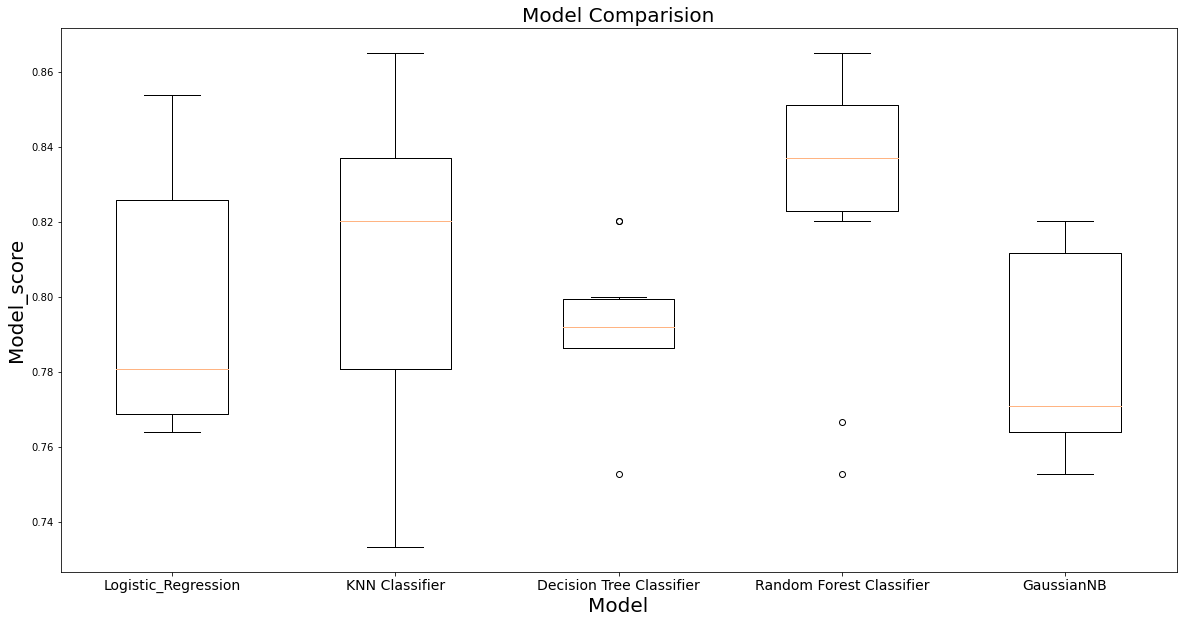

In [122]:
from sklearn import model_selection
seed = 7
results = []
names = [model_list]
scoring = 'accuracy'
for model in model_pipeline:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_data, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    msg = "%s:\n Mean: %f\n Std: (%f) \n Max:(%f)\n\n" % (model, cv_results.mean(), cv_results.std(), cv_results.max())
    print(msg)  
fig = plt.figure(figsize=(20,10))
plt.boxplot(results)
plt.ylabel("Model_score",fontsize =20)
plt.xlabel("Model",fontsize=20)
plt.xticks(range(1,len(model_list)+1), model_list,fontsize =14)
plt.title("Model Comparision",fontsize =20)

## Clearly Random Forest Classifier is the best Model .